In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 한글설정
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Win용
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac용
matplotlib.rcParams['font.size'] = 15 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

# df = pd.read_excel('score.xlsx',index_col='지원번호')
df = pd.read_csv('drinks.csv')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [ ]:
# df['continent'].fillna('OT',inplace=True)

In [17]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [18]:
df['total_servings'] = df['beer_servings']+df['spirit_servings']+df['wine_servings']

In [ ]:
## 대륙별 나라 개수
df['continent'].value_counts()

continent
AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: count, dtype: int64

In [31]:
df.groupby('continent')['total_servings'].sum()

continent
AF     4986
AS     4706
EU    21085
OC     2940
OT     7721
SA     4227
Name: total_servings, dtype: int64

In [30]:
## 대륙별 술 총소비량 
c_df = df.groupby('continent')['total_servings'].sum()

In [42]:
df['continent'].unique()  # 순서가 다름

array(['AS', 'EU', 'AF', 'OT', 'SA', 'OC'], dtype=object)

In [39]:
c_df.index

Index(['AF', 'AS', 'EU', 'OC', 'OT', 'SA'], dtype='object', name='continent')

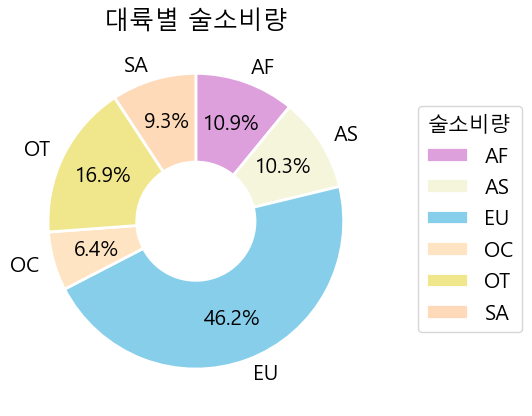

In [60]:
colors = ['plum','beige','skyblue','bisque','khaki','peachpuff']
wedgeprops = {'width':0.6,'edgecolor':'white','linewidth':2}
plt.title('대륙별 술소비량')
plt.pie(c_df,labels=c_df.index,colors=colors,autopct='%.1f%%',startangle=90,counterclock=False\
  ,wedgeprops=wedgeprops,pctdistance=0.7)
plt.legend(loc=(1.1,0.2),title='술소비량')
plt.show()

In [61]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent', 'total_servings'],
      dtype='object')

In [77]:
## total_litres_of_pure_alcohol
## 전체 평균보다 많은 알코올 도수를 섭취하는 대륙을 출력하시오.
# 1. 전체 평균 도수 구하기
# 2. 대륙별 도수 평균 구하기
# 3. 필터 구하기
# 4. 필터 적용해서 출력
# 1.
data = df['total_litres_of_pure_alcohol'].mean()
# 2.
total_df = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()

# 3.
# filt = df['키']>=180
# df[filt]
filt = total_df > data
total_df[filt]
total_df.index

Index(['AF', 'AS', 'EU', 'OC', 'OT', 'SA'], dtype='object', name='continent')

In [ ]:
#  평균 beer_servings이 가장 높은 대륙
## 대륙별 beer_servings를 높은순으로 출력하시오.
## 제일 높은 것만 출력
df.groupby('continent')['beer_servings'].mean().sort_values(ascending=False).head(1).index
df.groupby('continent')['beer_servings'].mean().max() # index의 해당되는 value값
df.groupby('continent')['beer_servings'].mean().idxmax() # index가 출력

'EU'

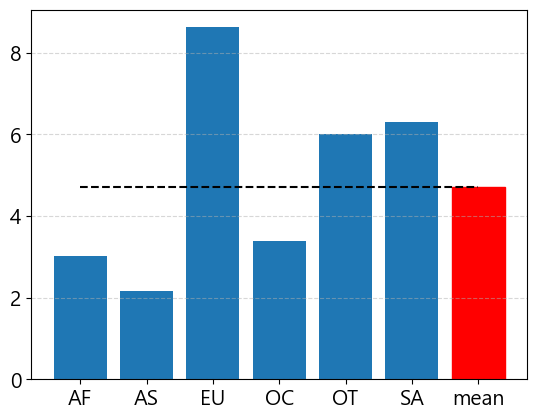

In [118]:
## 대륙별 total_litres_of_pure_alcohol 막대그래프로 출력하시오.
## 마지막에는 평균 막대그래프를 출력하시오.
# 1. 전체 total_litres_of_pure_alcohol 평균을 구하기
data = df['total_litres_of_pure_alcohol'].mean()
n_data = [data]*6
# 2. 대륙별 total_litres_of_pure_alcohol 평균을 구하기
# 'AF', 'AS', 'EU', 'OC', 'OT', 'SA'
con_df = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
con_df
# 3. 컬럼에 대륙별 평균을 추가하기 mean
con_df['mean'] = data

# 4. 막대그래프를 출력
con_bar = plt.bar(con_df.index,con_df)
plt.plot(con_df.index,[data]*7,ls="--",color='black')
plt.grid(axis='y',ls='--',alpha=0.5)  # 격자선
# con_bar[len(con_df)-1].set_color('red')
con_bar[len(con_df)-1].set_color('red')


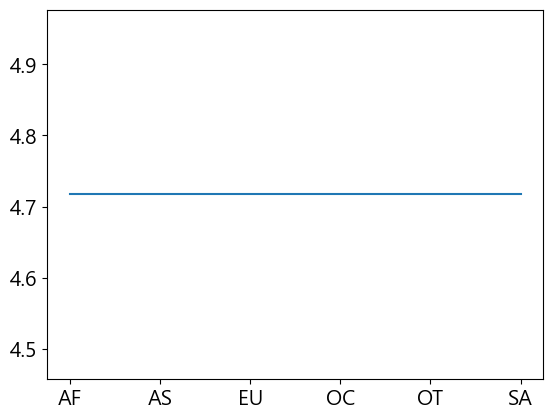